# CIFAR-10 Classification 

## Introduction 

Building a Convolutional Neural Network for image classification problem. The dataset used in this notebook is CIFAR-10 from Keras dataset. 

## Objectives 

Gradually building CNN from very basic and simple to more complex until accuracy hit at least 90%. 

## Importing Modules and Data 

The data is imported from Keras dataset. 

In [1]:
from tensorflow.keras.datasets import cifar10 

from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout, Flatten, Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint 

import math 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

In [3]:
print(f'There are {len(x_train)} training instances') 
print(f'There are {len(x_test)} testing instances') 
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

There are 50000 training instances
There are 10000 testing instances
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
x_train = x_train/255.0 
x_test = x_test/255.0 

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

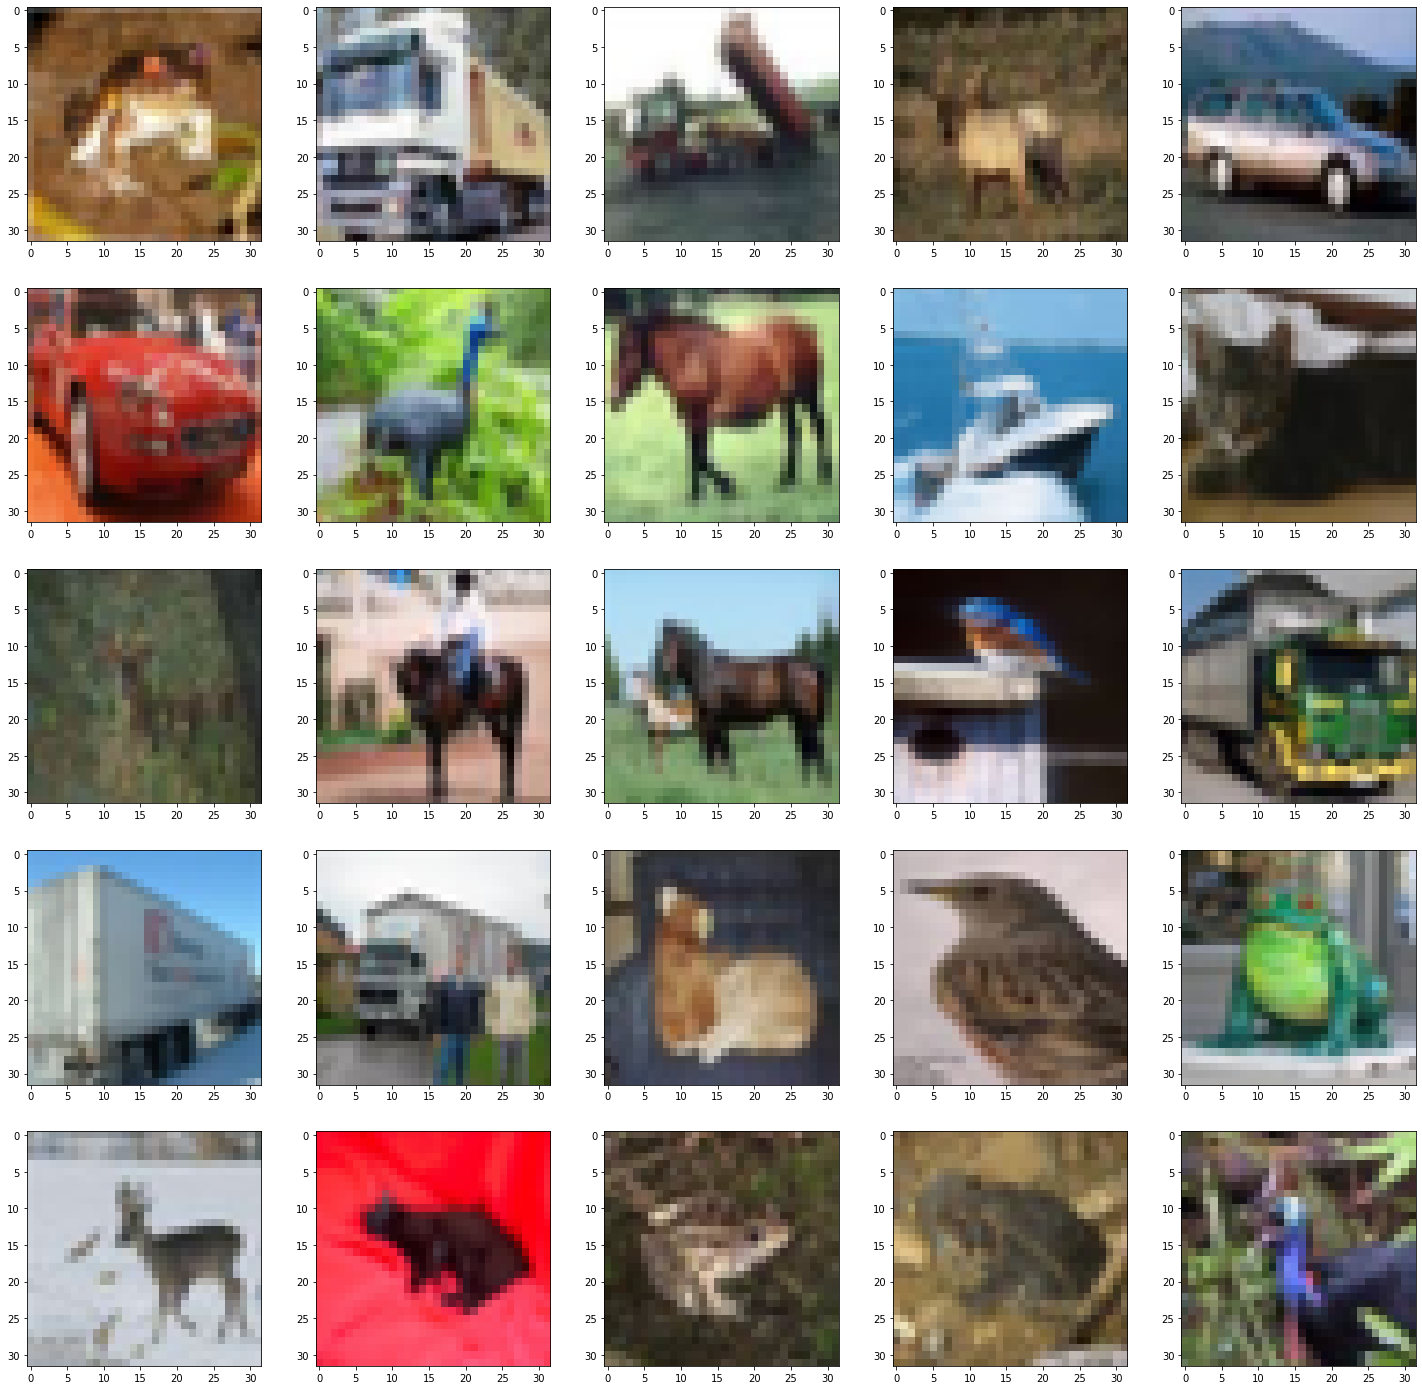

In [6]:
nrow = 5 
ncol = 5 

fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*5, ncol*5)) 
count = 0
for i in range(nrow): 
    for j in range(ncol): 
        ax[i,j ].imshow(x_train[count]) 
        count += 1


In [7]:
class myCallback(Callback): 
    def on_epoch_end(self, epoch, log={}): 
        if (log.get('accuracy') > 0.95): 
            print(f'\nAccuracy reached 95%, stop training!') 
            self.model.stop_training = True 

callback = myCallback()

early_stopping = EarlyStopping(monitor='val_accuracy', patience = 10, mode = 'max')

In [8]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
__________________________________________________

In [9]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history1 = model1.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback, early_stopping])

Epoch 1/50
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5734 - accuracy: 0.4315 - val_loss: 1.3675 - val_accuracy: 0.5120
Epoch 2/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.2690 - accuracy: 0.5496 - val_loss: 1.2368 - val_accuracy: 0.5709
Epoch 3/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.1474 - accuracy: 0.5991 - val_loss: 1.2011 - val_accuracy: 0.5825
Epoch 4/50
1250/1250 [==============================] - 17s 13ms/step - loss: 1.0633 - accuracy: 0.6258 - val_loss: 1.1289 - val_accuracy: 0.6111
Epoch 5/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.9925 - accuracy: 0.6532 - val_loss: 1.1600 - val_accuracy: 0.6037
Epoch 6/50
1250/1250 [==============================] - 17s 13ms/step - loss: 0.9358 - accuracy: 0.6732 - val_loss: 1.1607 - val_accuracy: 0.6135
Epoch 7/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.8824 - accuracy: 0.6930 - val_loss: 1.1251 -

<Figure size 432x288 with 0 Axes>

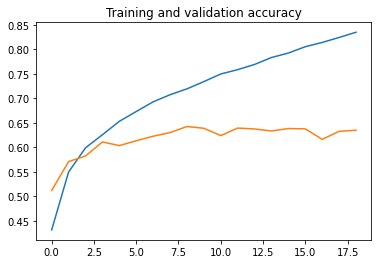

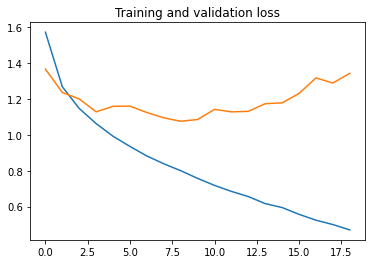

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history1.history['accuracy'] 
loss = history1.history['loss'] 
val_acc = history1.history['val_accuracy'] 
val_loss = history1.history['val_loss'] 

plt.plot(acc) 
plt.plot(val_acc) 
plt.title('Training and validation accuracy') 
plt.figure() 

plt.plot(loss) 
plt.plot(val_loss) 
plt.title('Training and validation loss') 
plt.figure() 


Training accuracy got above 95% but validation accuracy only got around 60%. Sign of overfitting. 

Next, let's build more CNN layers. 

In [11]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    MaxPooling2D((2, 2)), 
    Conv2D(32, (3, 3), activation="relu"), 
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [12]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history2 = model2.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5045 - accuracy: 0.4565 - val_loss: 1.2656 - val_accuracy: 0.5500
Epoch 2/50
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1829 - accuracy: 0.5793 - val_loss: 1.1435 - val_accuracy: 0.5976
Epoch 3/50
1250/1250 [==============================] - 17s 14ms/step - loss: 1.0205 - accuracy: 0.6413 - val_loss: 1.0839 - val_accuracy: 0.6177
Epoch 4/50
1250/1250 [==============================] - 17s 13ms/step - loss: 0.9113 - accuracy: 0.6818 - val_loss: 1.0045 - val_accuracy: 0.6477
Epoch 5/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.8359 - accuracy: 0.7055 - val_loss: 1.0146 - val_accuracy: 0.6555
Epoch 6/50
1250/1250 [==============================] - 17s 13ms/step - loss: 0.7653 - accuracy: 0.7315 - val_loss: 0.9477 - val_accuracy: 0.6776
Epoch 7/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.7073 - accuracy: 0.7528 - val_loss: 1.0038 -

<Figure size 432x288 with 0 Axes>

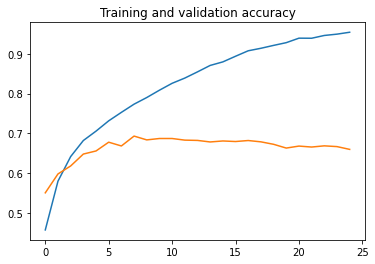

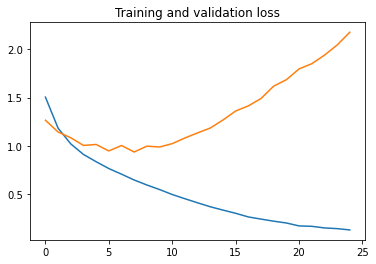

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history2.history['accuracy'] 
loss = history2.history['loss'] 
val_acc = history2.history['val_accuracy'] 
val_loss = history2.history['val_loss'] 

plt.plot(acc) 
plt.plot(val_acc) 
plt.title('Training and validation accuracy') 
plt.figure() 

plt.plot(loss) 
plt.plot(val_loss) 
plt.title('Training and validation loss') 
plt.figure() 


Validation accuracy increases about 4% from 60-61%. Adding dropout to reduce the complexity of the model. 

In [14]:
model3 = Sequential([ 
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Conv2D(32, (3, 3), activation="relu"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model3.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)         

In [16]:
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history3 = model3.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 22s 17ms/step - loss: 0.4822 - accuracy: 0.8278 - val_loss: 0.9510 - val_accuracy: 0.7070
Epoch 2/50
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4766 - accuracy: 0.8300 - val_loss: 0.9257 - val_accuracy: 0.7122
Epoch 3/50
1250/1250 [==============================] - 21s 16ms/step - loss: 0.4716 - accuracy: 0.8318 - val_loss: 0.9760 - val_accuracy: 0.7038
Epoch 4/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.4593 - accuracy: 0.8342 - val_loss: 0.9412 - val_accuracy: 0.7124
Epoch 5/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4613 - accuracy: 0.8359 - val_loss: 0.9590 - val_accuracy: 0.7097
Epoch 6/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4639 - accuracy: 0.8336 - val_loss: 0.9465 - val_accuracy: 0.7149
Epoch 7/50
1250/1250 [==============================] - 19s 16ms/step - loss: 0.4532 - accuracy: 0.8373 - val_loss: 0.9564 -

<Figure size 432x288 with 0 Axes>

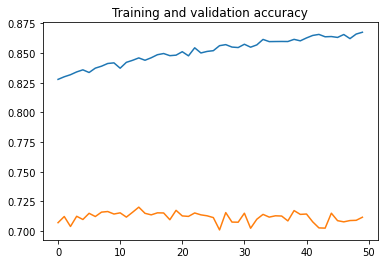

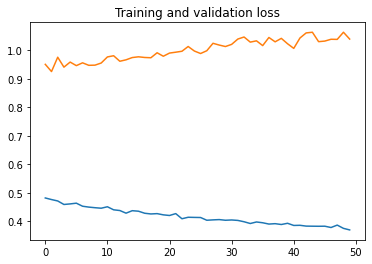

<Figure size 432x288 with 0 Axes>

In [17]:
acc = history3.history['accuracy'] 
loss = history3.history['loss'] 
val_acc = history3.history['val_accuracy'] 
val_loss = history3.history['val_loss'] 

plt.plot(acc) 
plt.plot(val_acc) 
plt.title('Training and validation accuracy') 
plt.figure() 

plt.plot(loss) 
plt.plot(val_loss) 
plt.title('Training and validation loss') 
plt.figure() 


The accuracy seems to still increasing but the validation metrics are still not smooth. Let's increase the rate of dropout and increase the convolutional layers. 

In [18]:
model4 = Sequential([ 
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)), 
    Conv2D(32, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.3), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.4), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model4.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [19]:
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history4 = model4.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 130s 104ms/step - loss: 1.6872 - accuracy: 0.3746 - val_loss: 1.3377 - val_accuracy: 0.5072
Epoch 2/50
1250/1250 [==============================] - 121s 97ms/step - loss: 1.2771 - accuracy: 0.5348 - val_loss: 1.1167 - val_accuracy: 0.5881
Epoch 3/50
1250/1250 [==============================] - 121s 97ms/step - loss: 1.1017 - accuracy: 0.6018 - val_loss: 1.0503 - val_accuracy: 0.6328
Epoch 4/50
1250/1250 [==============================] - 121s 97ms/step - loss: 0.9912 - accuracy: 0.6467 - val_loss: 0.9383 - val_accuracy: 0.6667
Epoch 5/50
1250/1250 [==============================] - 119s 95ms/step - loss: 0.9086 - accuracy: 0.6747 - val_loss: 0.8188 - val_accuracy: 0.7119
Epoch 6/50
1250/1250 [==============================] - 115s 92ms/step - loss: 0.8701 - accuracy: 0.6900 - val_loss: 0.7978 - val_accuracy: 0.7188
Epoch 7/50
1250/1250 [==============================] - 105s 84ms/step - loss: 0.8217 - accuracy: 0.7082 - val_loss: 

<Figure size 432x288 with 0 Axes>

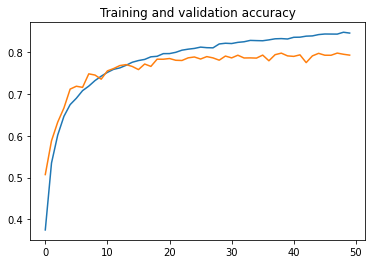

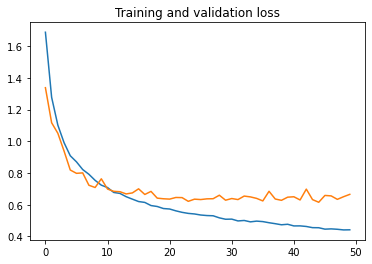

<Figure size 432x288 with 0 Axes>

In [20]:
acc = history4.history['accuracy'] 
loss = history4.history['loss'] 
val_acc = history4.history['val_accuracy'] 
val_loss = history4.history['val_loss'] 

plt.plot(acc) 
plt.plot(val_acc) 
plt.title('Training and validation accuracy') 
plt.figure() 

plt.plot(loss) 
plt.plot(val_loss) 
plt.title('Training and validation loss') 
plt.figure() 


In [21]:
model5 = Sequential([ 
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)), 
    BatchNormalization(), 
    Conv2D(32, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    MaxPooling2D((2, 2)), 
    Dropout(0.3), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    MaxPooling2D((2, 2)), 
    Dropout(0.4), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model5.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [23]:
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history5 = model5.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
  33/1250 [..............................] - ETA: 1:59 - loss: 2.2228 - accuracy: 0.2188

KeyboardInterrupt: 